In [1]:
import numpy as np

# Numpy array

## Slicing

In [2]:
a_array = np.array([2, 4, 6, 8, 10])
b_array = np.array([1, 3])
a_array[b_array] # idx 1, 3 에 있는 값만 슬라이싱한 것!

array([4, 8])

## Slicing with condition

In [3]:
a_array[a_array>5] # 5 초과인 value만 남도록 슬라이싱

array([ 6,  8, 10])

In [4]:
a_array[a_array%3==0] # 3 을 나눈 나머지가 0인 value만 남도록 슬라이싱

array([6])

## Outer product

a = [a0, a1, ..., aM] and b = [b0, b1, ..., bN]

[[a0*b0  a0*b1 ... a0*bN ]

 [a1*b0    .
 
 [ ...          .
 
 [aM*b0  ...       aM*bN ]]
 

In [5]:
np.outer(np.array([1, 2, 3]), np.array([1, 2]))

array([[1, 2],
       [2, 4],
       [3, 6]])

---

# Shallow neural network

## Data preparation

### XOR data

In [40]:
x_seeds = np.array([(0, 0), (1, 0), (0, 1), (1, 1)], dtype = np.float)
y_seeds = np.array([0, 1, 1, 0])

/var/folders/v1/zffq_5dd7ds_80dtp9nqzy580000gn/T/ipykernel_10043/4040752730.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x_seeds = np.array([(0, 0), (1, 0), (0, 1), (1, 1)], dtype = np.float)


In [41]:
N = 1000
idxs = np.random.randint(0, 4, N) # 1000개의 random int 생성

In [42]:
X = x_seeds[idxs]
Y = y_seeds[idxs]

In [43]:
X += np.random.normal(scale = 0.25, size = X.shape)

## ( Data plotting )

In [10]:
import matplotlib.pyplot as plt

idxs_1 = np.where(Y==1)
idxs_0 = np.where(Y==0)

In [11]:
X_0 = X[idxs_0]
Y_0 = Y[idxs_0]

X_1 = X[idxs_1]
Y_1 = Y[idxs_1]

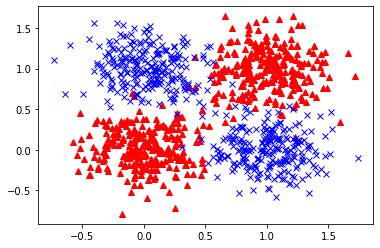

In [12]:
plt.plot(X_0[:,0],X_0[:,1],"r^")
plt.plot(X_1[:,0],X_1[:,1],"bx")
plt.show()

## Model

In [44]:
class shallow_neural_network():
    def __init__(self, num_input_features, num_hiddens):
        self.num_input_features = num_input_features
        self.num_hiddens = num_hiddens
        
        self.W1 = np.random.normal(size = (num_hiddens, num_input_features))
        self.b1 = np.random.normal(size = num_hiddens)
        self.W2 = np.random.normal(size = num_hiddens)
        self.b2 = np.random.normal(size = 1)
        
    def sigmoid(self, z):
        return 1/(1 + np.exp(-z))
    
    def predict(self, x):
        z1 = np.matmul(self.W1, x) + self.b1
        a1 = np.tanh(z1)
        z2 = np.matmul(self.W2, a1) + self.b2
        a2 = self.sigmoid(z2)
        return a2, (z1, a1, z2, a2)

In [95]:
model = shallow_neural_network(2, 3)

## Train (with element-wise operations)

$\frac{\partial L(a^{[2]}, y)}{\partial b^{[2]}} = a^{[2]}-y$

$\frac{\partial L(a^{[2]}, y)}{\partial {w_i}^{[2]}} = (a^{[2]}-y){a_i}^{[1]}$

$\frac{\partial L(a^{[2]}, y)}{\partial {b_i}^{[1]}} = (a^{[2]}-y){w_i}^{[2]}(1-{{a_i}^{[1]}}^{2})$

$\frac{\partial L(a^{[2]}, y)}{\partial {W_{ij}}^{[1]}} = (a^{[2]}-y){w_i}^{[2]}(1-{{a_i}^{[1]}}^{2})x_j$

In [15]:
def train(X, Y, model, lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x, y in zip(X, Y):
        a2, (z1, a1, z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
            
        diff = a2-y
        
        # layer 2
        # db2
        db2 += diff
        
        # dw2
        for i in range(model.num_hiddens):
            dW2[i] += a1[i]*diff
            
        # layer 1
        # db1
        for i in range(model.num_hiddens):
            db1[i] += (1-a1[i]**2)*model.W2[i]*diff
        # db2
        for i in range(model.num_hiddens):
            for j in range(model.num_input_features):
                dW1[i, j] += x[j]*(1-a1[i]**2)*model.W2[i]*diff
                
    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m
        
    return cost

In [16]:
for epoch in range(100):
    cost = train(X, Y, model, 1.0)
    if epoch %10 == 0:
        print(epoch, cost)

0 [1.2365836]
10 [0.58009426]
20 [0.47359193]
30 [0.38875027]
40 [0.33734212]
50 [0.30546415]
60 [0.28293487]
70 [0.26411195]
80 [0.24625433]
90 [0.22917946]


## Train (with vector operations)

In [94]:
def train_v(X, Y, model, lr = 0.1):
    dW1 = np.zeros_like(model.W1)
    db1 = np.zeros_like(model.b1)
    dW2 = np.zeros_like(model.W2)
    db2 = np.zeros_like(model.b2)
    m = len(X)
    cost = 0.0
    for x, y in zip(X, Y):
        a2, (z1, a1, z2, _) = model.predict(x)
        if y == 1:
            cost -= np.log(a2)
        else:
            cost -= np.log(1-a2)
            
        diff = a2-y
        
        # layer 2
        # db2
        db2 += diff
        
        # dw2
#         for i in range(model.num_hiddens):
#             dW2[i] += a1[i]*diff
        dW2 += a1 * diff
            
        # layer 1
        # db1
#         for i in range(model.num_hiddens):
#             db1[i] += (1-a1[i]**2)*model.W2[i]*diff
        db1_tmp = diff * (np.multiply(model.W2, (1-a1**2)))
        db1 += db1_tmp

        # db2
#         for i in range(model.num_hiddens):
#             for j in range(model.num_input_features):
#                 dW1[i, j] += x[j]*(1-a1[i]**2)*model.W2[i]*diff
        dW1 += np.outer(db1_tmp, x)
                
    cost /= m
    model.W1 -= lr * dW1/m
    model.b1 -= lr * db1/m
    model.W2 -= lr * dW2/m
    model.b2 -= lr * db2/m
        
    return cost

In [96]:
for epoch in range(100):
    cost = train_v(X, Y, model, 1.0)
    if epoch %10 == 0:
        print(epoch, cost)

0 [0.73125116]
10 [0.61872451]
20 [0.55387701]
30 [0.48639311]
40 [0.41940482]
50 [0.36382926]
60 [0.32118862]
70 [0.289089]
80 [0.26467049]
90 [0.24568619]


## Test

In [97]:
model.predict((1, 1))[0].item()

0.09389137642641512

In [98]:
model.predict((1, 0))[0].item()

0.9660594980403525

In [99]:
model.predict((0, 1))[0].item()

0.8906991882011334

In [100]:
model.predict((0, 0))[0].item()

0.04290283547871071